***AVACADO PROJECT***

***Importing Necessary Libraries***

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import pickle

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")


***Importing Data set***

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***performing EDA***

In [5]:
df.shape

(16468, 14)

In [6]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(1517, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 177.8+ KB


In [10]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


observation
no missing values
11 numerical columns and 3 object columns
some features are not distributed normally, are close to normality
each feature has different scale range
some of the columns providing information about bag are not used for predictions ,better to drop them
unnamed:0 is also not useful to prediction, its giving info about index
    

In [11]:
df.drop(['Unnamed: 0','XLarge Bags','Small Bags','Total Bags','Large Bags'], axis=1, inplace= True)

In [12]:
df.shape

(1517, 9)

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,2016.000000


In [14]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,conventional,2015.0,Albany


In [15]:
df[["Date", "Month", "Year"]] = df["Date"].str.split("-", expand = True)

In [16]:
# converting objects into integer datatype
df[["Date", "Month", "Year"]]=df[["Date", "Month", "Year"]].astype(int)

In [17]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Year
0,27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015.0,Albany,12,2015
1,20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015.0,Albany,12,2015
2,13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015.0,Albany,12,2015
3,6,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015.0,Albany,12,2015
4,29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015.0,Albany,11,2015


In [18]:
df['Year'].value_counts()

2015    1270
2016     247
Name: Year, dtype: int64

Now we can notice we have 2 columns for years and both having same unique value so droping one of them

In [19]:
df.drop(['year'],axis=1, inplace=True)

In [20]:
df['type'].nunique()

1

As we can see we only one type so we are droping the column because all values are same.

In [21]:
df.drop(['type'],axis=1, inplace=True)

In [22]:
df['region'].nunique()

51

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   int32  
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   region        1517 non-null   object 
 7   Month         1517 non-null   int32  
 8   Year          1517 non-null   int32  
dtypes: float64(5), int32(3), object(1)
memory usage: 100.7+ KB


no missing values in data set
now 8 numerical columns and 1 object column in our dataset


In [24]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,region,Month,Year
0,27,1.33,64236.62,1036.74,54454.85,48.16,Albany,12,2015
1,20,1.35,54876.98,674.28,44638.81,58.33,Albany,12,2015
2,13,0.93,118220.22,794.70,109149.67,130.50,Albany,12,2015
3,6,1.08,78992.15,1132.00,71976.41,72.58,Albany,12,2015
4,29,1.28,51039.60,941.48,43838.39,75.78,Albany,11,2015


In [26]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Month,Year
Date,1.000000,0.092531,-0.022423,-0.018394,-0.032709,-0.014611,0.034279,0.023543
AveragePrice,0.092531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,0.066859,0.178683
Total Volume,-0.022423,-0.140470,1.000000,0.985568,0.987154,0.934347,-0.090520,-0.004189
4046,-0.018394,-0.190096,0.985568,1.000000,0.951952,0.898570,-0.090647,-0.040439
4225,-0.032709,-0.092084,0.987154,0.951952,1.000000,0.927757,-0.091329,-0.007254
4770,-0.014611,-0.100567,0.934347,0.898570,0.927757,1.000000,-0.074855,0.029222
Month,0.034279,0.066859,-0.090520,-0.090647,-0.091329,-0.074855,1.000000,0.004111
Year,0.023543,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.004111,1.000000


<Axes: >

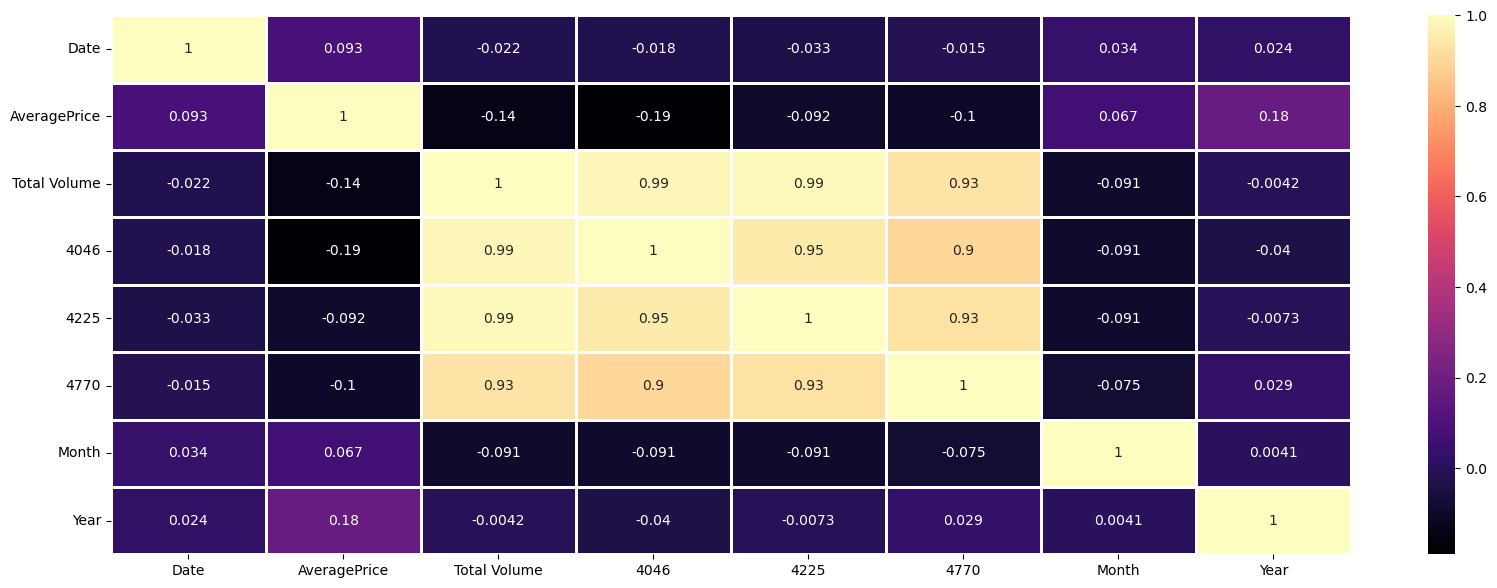

In [27]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='white',cmap='magma')

We don't see any column fairely correlated with Average price

some of them are negatively correalted with data

columns

4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold
Total Volume - Total number of avocados sold
are highly correlated with each other, that could be possible because they all are sold information

<Axes: xlabel='Date', ylabel='Count'>

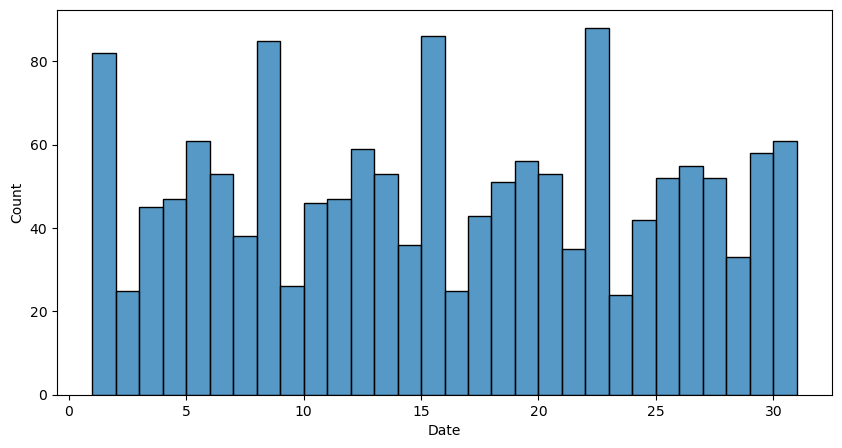

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df['Date'], bins=30)

Sold on everyday is around 40 to 60 avacado
maximum sold in a day
we can notice after every 6 days there is hike in sell that must be the weekend

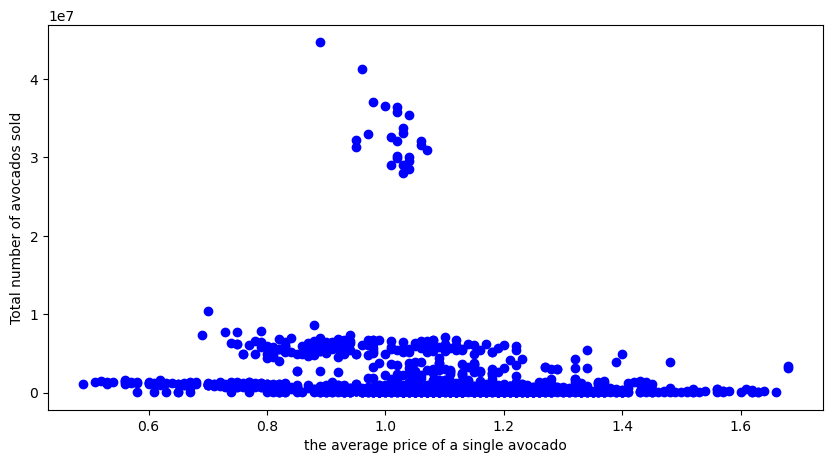

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['Total Volume'],c='blue')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados sold')
plt.show()

max average price seems 0.8 to 1.2
having outliers as well

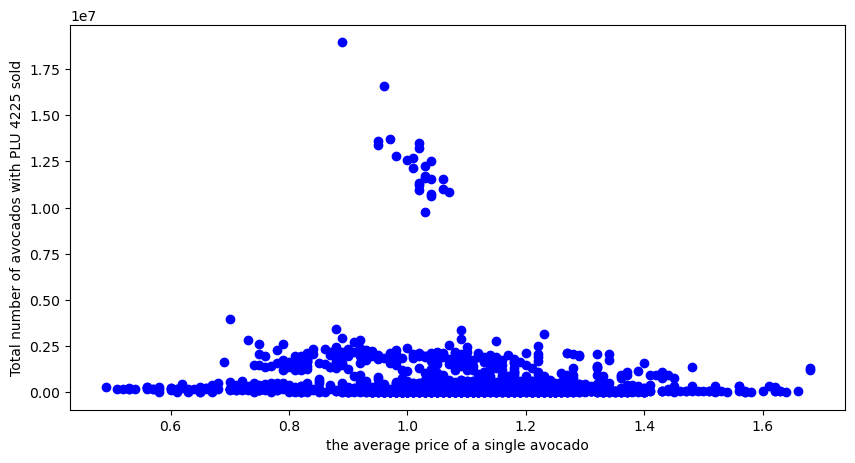

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['4225'],c='blue')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados with PLU 4225 sold')
plt.show()

Here we also see maximum average price is 0.8 to 1.3 and outliers as well

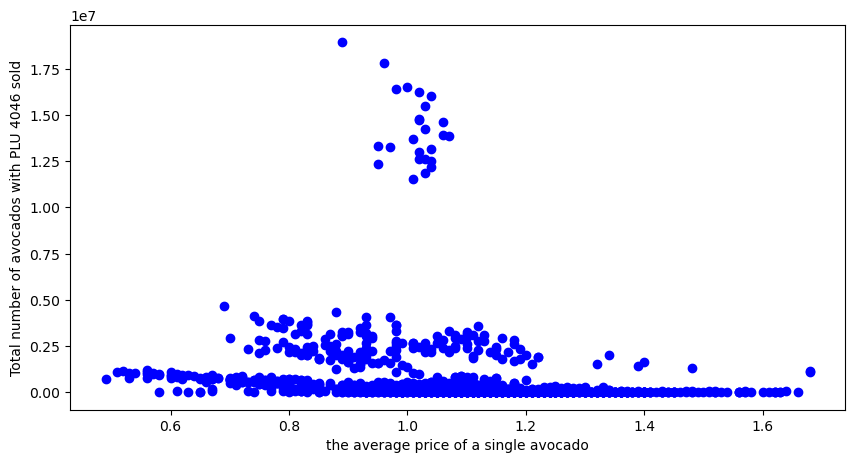

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['4046'],c='blue')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados with PLU 4046 sold')
plt.show()

Here we also see maximum average price is 0.8 to 1.3 and outliers as well

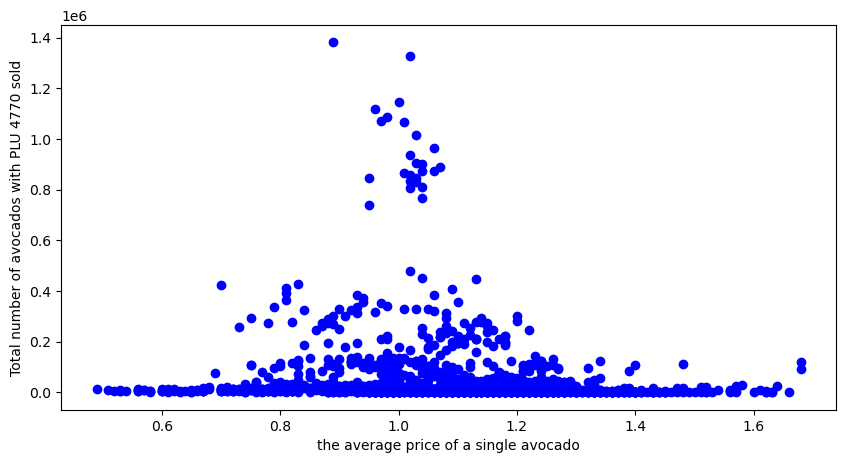

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['4770'],c='blue')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados with PLU 4770 sold')
plt.show()

Here we also see maximum average price is 0.8 to 1.2 and outliers as well

<Axes: xlabel='Year', ylabel='count'>

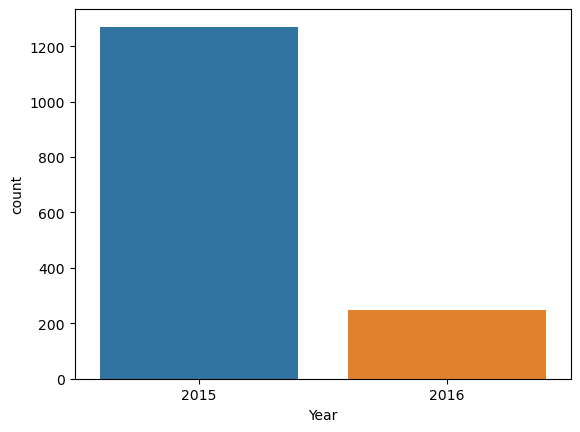

In [34]:
sns.countplot(x='Year',data=df)

We see here maximum data we have from year of 2015

<Axes: xlabel='Month', ylabel='count'>

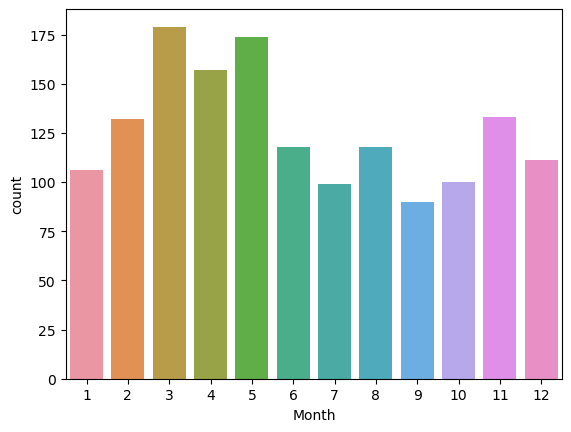

In [35]:
sns.countplot(x='Month',data=df)

Here we can see maximum avacado are sold in month 3, 4, and 5 and months are on average sale

Using LabelEncoder for convering categorical to numerical

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   int32  
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   region        1517 non-null   object 
 7   Month         1517 non-null   int32  
 8   Year          1517 non-null   int32  
dtypes: float64(5), int32(3), object(1)
memory usage: 100.7+ KB


In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['region']=le.fit_transform(df['region'])

Skewness Hnadling

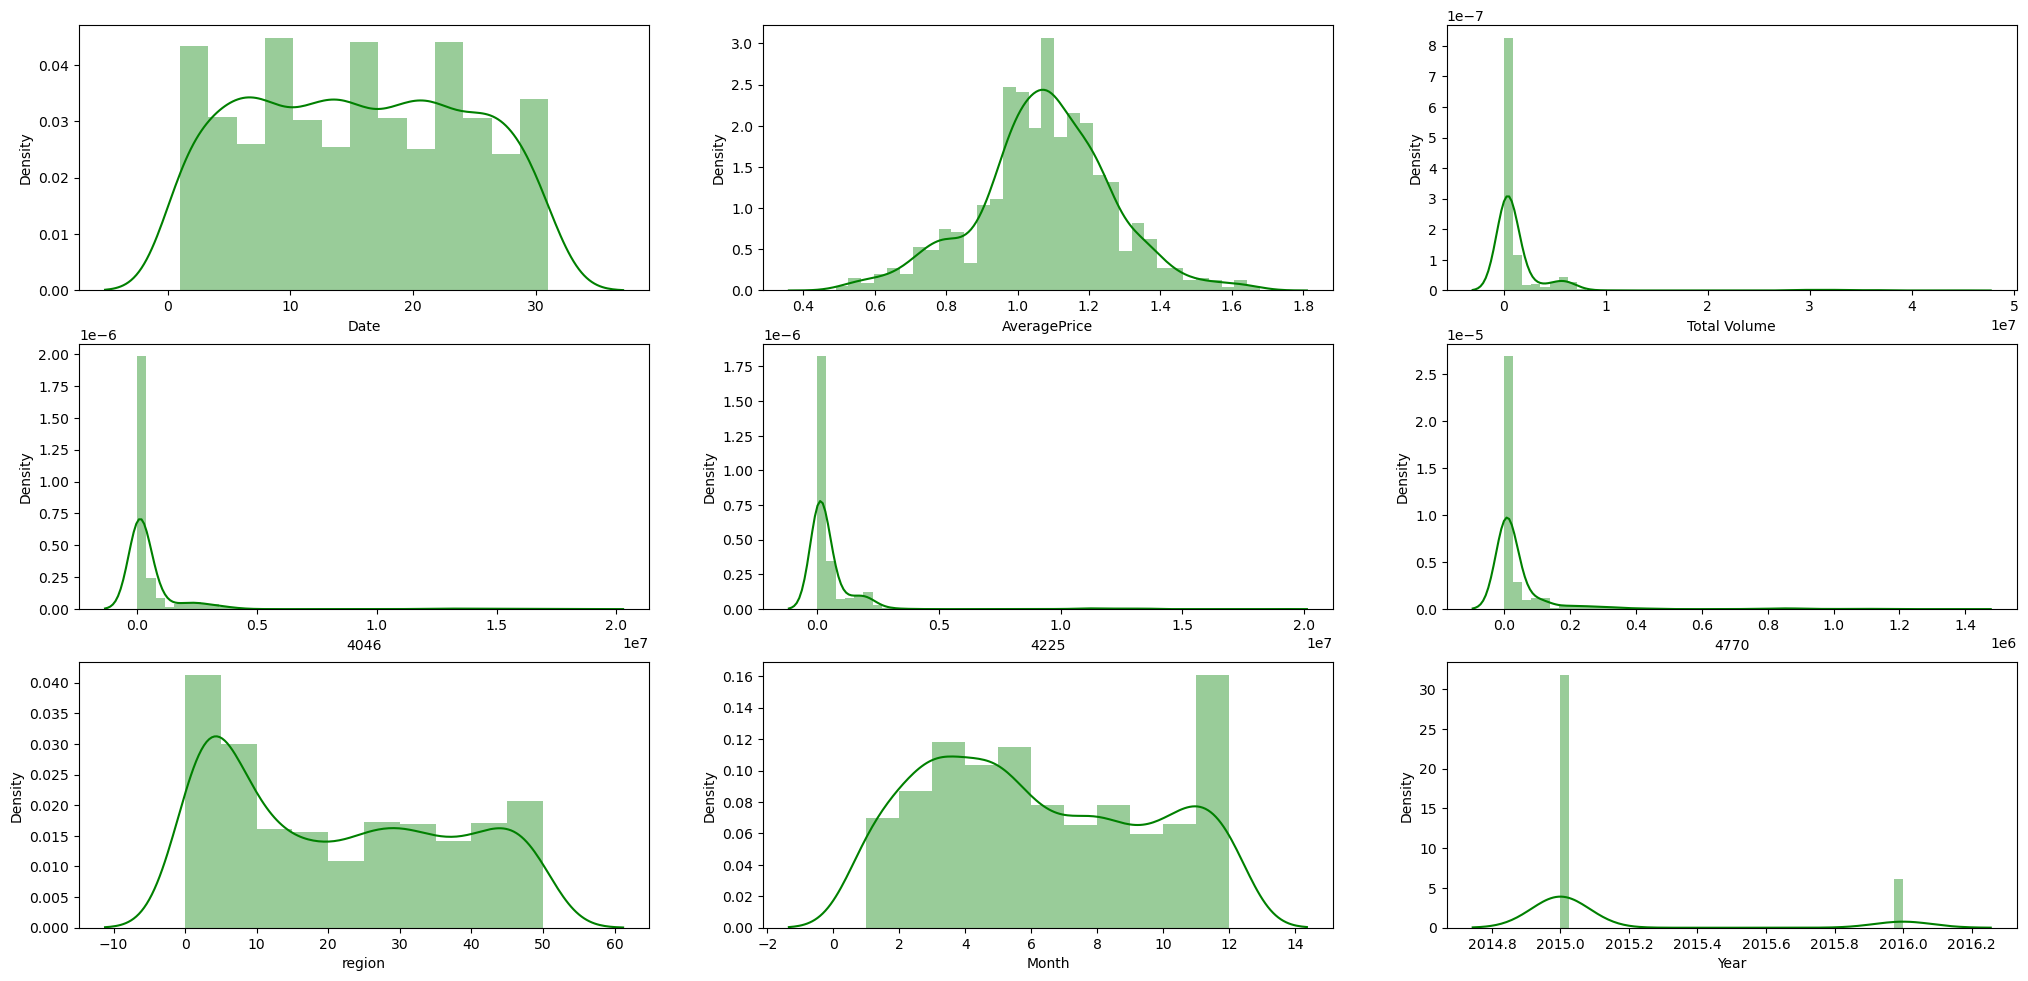

In [38]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [47]:
df.skew()

Date            0.027740
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
region          0.288146
Month           0.233418
Year            1.828332
dtype: float64

skewness more than+/- 0.5 will we treated
we can see here most of the columns are skewed
will only deal with numercal columns
Total Volume
4046
4225
4770
will be treated

In [39]:
from sklearn.preprocessing import power_transform

df[['Total Volume','4046','4225','4770']]=power_transform(df[['Total Volume','4046','4225','4770']],method='yeo-johnson')

In [40]:
df.skew()

Date            0.027740
AveragePrice   -0.109444
Total Volume    0.071159
4046           -0.012059
4225            0.008450
4770           -0.032945
region          0.288146
Month           0.233418
Year            1.828332
dtype: float64

we can see here skewness is removed from all columns

HANDling Outliers

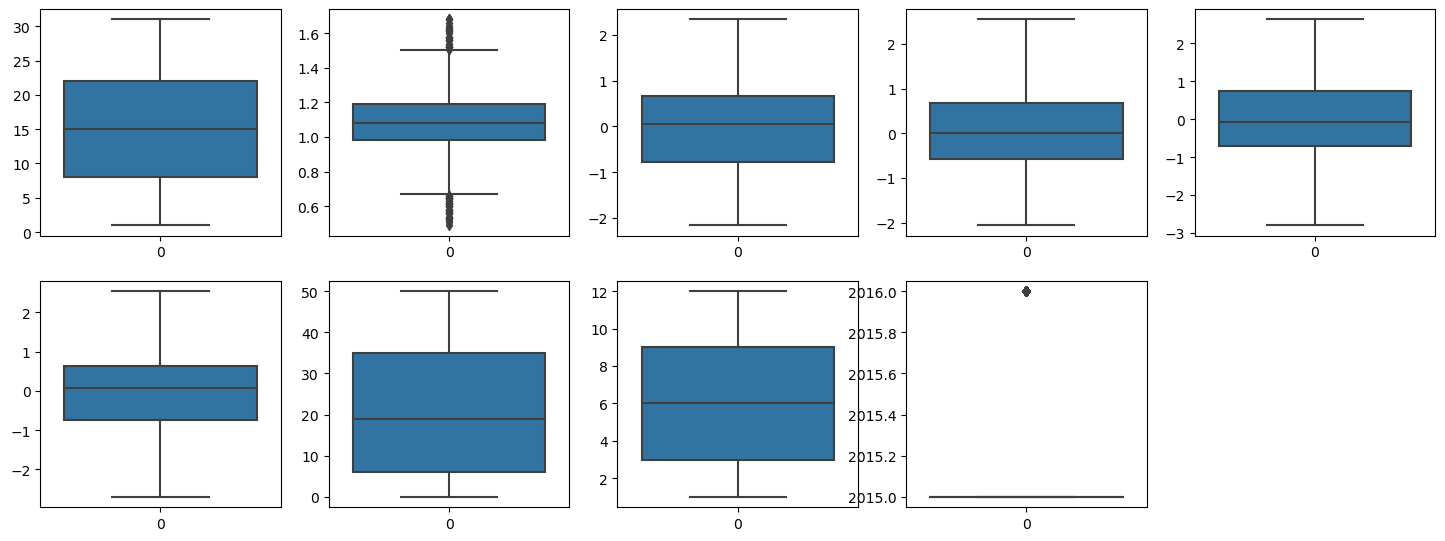

In [41]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(3,5,o[0]+1)
    sns.boxplot(df[o[1]])

Only Target columns seems having outliers after skewness removed .

In [42]:
#zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([ 760, 1411, 1457, 1458], dtype=int64), array([1, 1, 1, 1], dtype=int64))


In [43]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (1517, 9)
After removing outliers:: (1513, 9)


In [53]:
#Zscore removing all rows from data

In [44]:
#IQR
from scipy import stats 
IQR = stats.iqr(df) 
IQR 

11.839764500065886

In [45]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(1517, 9)


In [56]:
#according IQR not outliers present so taking as it is

In [46]:
df=df_out

In [58]:
#Dividing data into X and Y

In [47]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

In [48]:
x.shape

(1517, 8)

In [49]:
y.shape

(1517,)

In [50]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [51]:
#data have been scaled

pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [52]:
pd.DataFrame(x).describe()


,0,1,2,3,4,5,6,7
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,0.481652,0.479736,0.446655,0.514899,0.515111,0.423929,0.469707,0.162821
std,0.293224,0.222194,0.217371,0.183939,0.190796,0.322648,0.308295,0.369324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.308777,0.320944,0.383731,0.375955,0.120000,0.181818,0.000000
50%,0.466667,0.492749,0.448171,0.501067,0.529674,0.380000,0.454545,0.000000
75%,0.700000,0.627992,0.594504,0.650355,0.636561,0.700000,0.727273,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Splitting the data for training and testing

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [54]:
#Let's find the best random state in below cell

from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is:-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is:-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is:-0.31947171852399603
At random state 0, The test accuracy is:-0.2442959889083054


At random state 1, The training accuracy is:-0.284768706646208
At random state 1, The test accuracy is:-0.36584480825839316


At random state 2, The training accuracy is:-0.29206049997120087
At random state 2, The test accuracy is:-0.34124260986825605


At random state 3, The training accuracy is:-0.3218701737030851
At random state 3, The test accuracy is:-0.22385203996792413


At random state 4, The training accuracy is:-0.32782606738441233
At random state 4, The test accuracy is:-0.18912795467440802


At random state 5, The training accuracy is:-0.30282360828695554
At random state 5, The test accuracy is:-0.30770247018397545


At random state 6, The training accuracy is:-0.30097301389990117
At random state 6, The test accuracy is:-0.29229429348822633


At random state 7, The training accuracy is:-0.31571414622977256
At random state 7, The test accuracy is:-0.

random state=24 giving highest accuracy, choosing that as random state

In [55]:
#splitting the data into 78% training and 22% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=24)

In [56]:
x_train.shape

(1183, 8)

In [57]:
y_train.shape

(1183,)

In [58]:
x_test.shape

(334, 8)

In [59]:
y_test.shape

(334,)

In [105]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

***MODEL BUILDING:***

***Linear Regression***

In [111]:
from sklearn.linear_model import LinearRegression

def reg(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=672)
    
    #model fitting
    model.fit(X_train,Y_train)
    
    #predicting the model
    pred=model.predict(X_test)
    
    
    #Mean squared error
    print('mean square error',mean_squared_error(pred,Y_test))
    
    #R2_score
    r2=r2_score(pred,Y_test,multioutput="variance_weighted")*100
    print('r2_score',r2)
    
    #cv score
    cv_score=cross_val_score(model,x,y,cv=5).mean()*100
    print('cv score ',cv_score)
    #final score 
    result=r2-cv_score
    print('final score =',result)

In [112]:
model=LinearRegression()
reg(model,x,y)

mean square error 0.024323936065627667
r2_score -118.50222193953756
cv score  0.3501999874166595
final score = -118.85242192695422


In [115]:
#Random forest regressor
model=RandomForestRegressor()
reg(model,x,y)

mean square error 0.0060372650263157916
r2_score 77.62079703484024
cv score  10.825091123005642
final score = 66.7957059118346


In [118]:
#AdaBoostRegressor
model=AdaBoostRegressor()
reg(model,x,y)

mean square error 0.013302848157962604
r2_score 20.522109540847243
cv score  14.376962132053464
final score = 6.145147408793779


In [119]:
#support vector Regressor
model=SVR()
reg(model,x,y)

mean square error 0.010937028160358802
r2_score 57.3847501243124
cv score  22.388208930172038
final score = 34.99654119414036


In [120]:
#dtr
model=DecisionTreeRegressor()
reg(model,x,y)

mean square error 0.012698157894736843
r2_score 65.9646028632579
cv score  -43.64236906128324
final score = 109.60697192454114


In [121]:
#Ridge
model=Ridge(alpha=1)
reg(model,x,y)

mean square error 0.02436187015193265
r2_score -134.19758996231909
cv score  2.6594920097500774
final score = -136.85708197206915


In [122]:
#Lasso
model=Lasso(alpha=1)
reg(model,x,y)

mean square error 0.03770812575116709
r2_score 0.0
cv score  -3.6061024324492985
final score = 3.6061024324492985


In [123]:
#XGBRegressor
model=XGBRegressor()
reg(model,x,y)

mean square error 0.004914427088289776
r2_score 85.02325989521131
cv score  -16.735575598956643
final score = 101.75883549416795


In [124]:
# Hyper parameter tuning for best ML model

#XGBRegressor
fmod_param={'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

In [125]:
GSCV=GridSearchCV(XGBRegressor(),fmod_param,cv=5)

In [128]:
GSCV.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [2.0, 3.0, 4.0], 'max_depth': [4, 6, 8],
                         'n_estimators': [200, 400, 600],
                         'n_jobs': [-2, -1, 1]})

In [129]:
GSCV.best_params_

{'gamma': 2.0, 'max_depth': 4, 'n_estimators': 200, 'n_jobs': -2}

In [130]:
GSCV.best_score_

0.3110857468245221

In [135]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 37.65992241657054
